<a href="https://colab.research.google.com/github/SachinScaler/Oct24HypothesisTesting/blob/main/T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Use Case: Improve IQ with Pill
Suppose that the average IQ of the population is known to be 100

A researcher claims that his pill will improve IQ

What are the null and alternate hypothesis?
```
H0: μ = 100 (pill has no effect)
Ha: μ > 100 (pill has positive effect)
```

In [1]:

# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [2]:
sum(iq_scores) / len(iq_scores)  # mean iq

103.5

- Note that here, we have no clue about the value of population std deviation.
- Hence, we would not be able to calcluate the Z-test statistic.
- In fact, in most real world scenarios, the population standard deviation is often unknown.

Can we replace population standard deviation with sample standard deviation in z-statistic Formula?

Yes.This is NOT the z-score anymore, in fact, it is known as the T-Statistic that yields T Distribution



In [3]:
from scipy.stats import ttest_1samp

# null hypothese value = 100
t_stat, pvalue = ttest_1samp(iq_scores, 100)
t_stat, pvalue

(1.5071573172061195, 0.1754994493585011)

In [5]:
alpha = 0.05 # 99% confidence

if pvalue < alpha:
  print('Reject H0; Pill has effect')
else:
  print ('Fail to Reject H0; Pill has NO effect')

Fail to Reject H0; Pill has NO effect


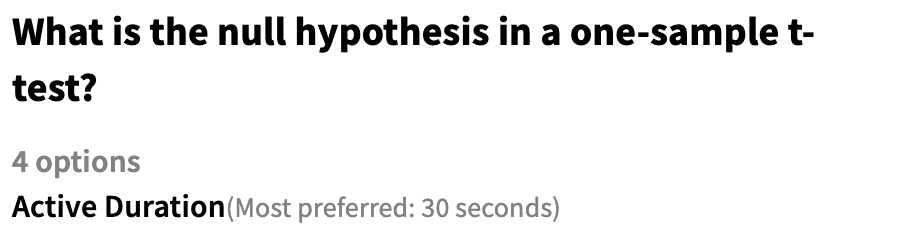

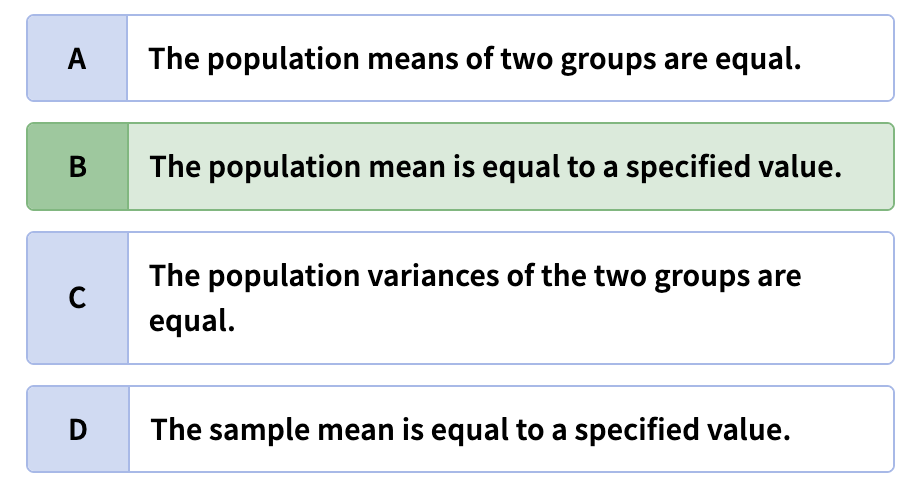

### Two Sample T-Test

In [7]:
import pandas as pd

df_iq = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/iq_two_schools.csv')
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [8]:
df_iq.groupby('School')['iq'].mean()

,iq
School,
school_1,101.153846
school_2,109.416667


In [10]:
df_iq['School'].value_counts()

,count
School,
school_1,26
school_2,24


q6:
```
Suppose we have IQ data samples across 2 schools: a private School and a public School.

We want to compare and see if there's significant difference in IQ of the two schools.

1) By Analysing the data below, which test do you think will be most suitable for this activity?
- One Sample Z-Test
- Two Sample Z-Test
- One Sample T-Test
- Two Sample T-Test

2) Which tailed test would be applicable for above claim.
- two tailed
- left tailed
- right tailed

3) Implement the test and share your insight.

use alpha = 0.05
```

Exp1:
```
H0: Both school's students have the same IQ: μ1 = μ2

H1: Both school's students DO NOT have the same IQ
μ1 ≠ μ2
```

In [11]:
from scipy.stats import ttest_ind

In [12]:
iq_1 = df_iq[df_iq['School'] == 'school_1']['iq']

iq_2 = df_iq[df_iq['School'] == 'school_2']['iq']

In [14]:
len(iq_1), len(iq_2)

(26, 24)

In [16]:
# null hypothese value: u1 = u2
t_stat, pvalue = ttest_ind(iq_1, iq_2)
t_stat, pvalue

(-2.4056474861512704, 0.02004552710936217)

In [17]:
alpha = 0.05
if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')


Reject H0


Ex2:
```
H0: Both school's students have the same IQ: μ1 = μ2

H1: Schools 1's IQ is greater than school 2: μ1 > μ2
```

In [18]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative='greater')
t_stat, pvalue

(-2.4056474861512704, 0.9899772364453189)

In [19]:
# H0: Both school's students have the same IQ: μ1 = μ2
# H1: HSchools 1's IQ is greater than school 2.
alpha = 0.05
if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')


Fail to Reject H0


Ex3:
```
H0: Both school's students have the same IQ: μ1 = μ2

H1: Schools 1's IQ is greater than school 2: μ1 < μ2
```

In [20]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative='less')
t_stat, pvalue

(-2.4056474861512704, 0.010022763554681085)

In [21]:
alpha = 0.05
if pvalue < alpha:
  print('Reject H0')
else:
  print('Fail to Reject H0')

Reject H0


In [22]:
df_iq.groupby('School')['iq'].mean()

,iq
School,
school_1,101.153846
school_2,109.416667


### Cricket Example

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/Sachin_ODI.csv')
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [24]:
df.groupby('Inns')['runs'].mean()

,runs
Inns,
1,46.670588
2,40.173684


### Part1:
**What do you think, is it a coincidence or is it significant?**

**Let's find out**:

What will be the null and alternate hypothesis?

Let the average runs scored in the first and second innings be μ1 and μ2 respectively.
```
H0: μ1 = μ2
```
For the alternate hypothesis, we have a sense that maybe the runs scored in the first innings are greater than in the second innings.

So we can set it like:
```
Ha: μ1 > μ2
```


In [25]:
df_first_innings = df[df['Inns'] == 1]
df_second_innings = df[df['Inns'] == 2]

In [26]:
df['Inns'].value_counts()

,count
Inns,
2,190
1,170


Inning(categorical) --> Score(continous)

In [27]:
## Activity: Test the above alternate

In [29]:
from statsmodels.stats.weightstats import ztest



### Part2:
**What if we want to look at the Batting pattern when the team won vs lost?**


In [38]:
df.groupby('Won')['runs'].mean()

,runs
Won,
False,35.130682
True,51.000000


What are null and alternate hypothesis?
```
H0: μ1 = μ2
```
i.e. No difference in batting, irrespective of win or loss

and
```
Ha: μ1 > μ2
```
i.e. better batting when match is won

Win(categorical) --> Runs(continous)

**Therefore** we can say that:

- runs and Won have a good relationship between them.
- Whereas, runs and Inns did not.

### **HW**:
Suppose there are 2 competing companies that have created a drug for tackling the same disease.

A test was conducted using these 2 drugs on a group of people and you are given the same in the following data.

This data contains the number of days an individual took to recover from illness, using the mentioned drug.

Which drug is more effective?

In [32]:
d1 = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/drug_1_recovery.csv')
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [33]:
d2 = pd.read_csv(r'https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/drug_2_recovery.csv')
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [35]:
d1.mean()

,0
drug_1,7.104917


In [34]:
d2.mean()

,0
drug_2,8.073423


We observe from sample means that the recovery time of drug 1 seems better (less no of days).

So we define a hypothesis as:
```
H0: μ1 = μ2

Ha: μ1 < μ2
```

Based on this we perform Two sample T-test with alpha = 0.05

### Aerofit case study

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


We were asked to come up with insights based on this data.

Find relations between different variables.


**Did you notice?**

In all the examples we've solved while performing the T-test, we've done a numeric variable vs. a categorical variable (having 2 categories only).
For e.g.,:
- Runs (num.) for 1st and 2nd innings (cat.)
- Runs (num.) for when the match is won/lost (cat.)
- Recovery time (num.) of Drug 1 vs Drug 2 (cat.)

T-test can only be used in this situation only, i.e. when analysing between one numerical and one categorical (having 2 categories) features.




So, in the Aerofit data, we can compare such scenarios using T-test.

For e.g.,:

- Income vs Gender
To analyze the difference in average salaries of men and women
Gender vs Income.

Let's visualize using boxplot

<Axes: xlabel='Gender', ylabel='Income'>

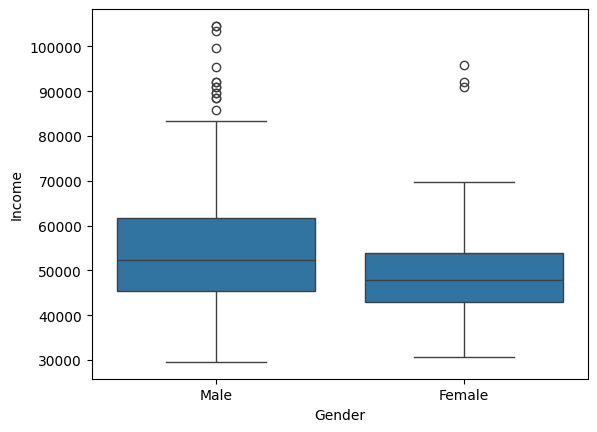

In [40]:
import seaborn as sns

sns.boxplot(x='Gender', y='Income', data=df)


In [42]:
df.groupby('Gender')['Income'].mean()

,Income
Gender,
Female,49828.907895
Male,56562.759615


From this plot, I am tempted to think that the salaries of men are more than that of women on average.


Let's test the same using the T-test.

Null and Alternate hypothesis

If μ1 is average income of men, and μ2 is of women,

```
H0: μ1 = μ2
Ha: μ1 > μ2
```


In [43]:
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

In [44]:
t_stat, pvalue = ttest_ind(income_male, income_female, alternative="greater")
t_stat, pvalue

(2.752488637540257, 0.003263631548607129)

In [45]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('Men earn more than females.')
else:
  print ('Fail to Reject H0')

Reject H0
Men earn more than females.


### Paired Test:

In [46]:
!wget --no-check-certificate https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae -O problem_solving.csv


--2024-10-26 03:17:45--  https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.google.com (drive.google.com)... 142.251.170.100, 142.251.170.102, 142.251.170.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.170.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae [following]
--2024-10-26 03:17:46--  https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.8.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277 (1.2K) [application/octet-stream]
Saving to: ‘problem_solving.csv’

problem_solving.csv 100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-10-26 03:17:48 (54.1 M

In [48]:
Path= '/content/problem_solving.csv'
df_ps = pd.read_csv(Path)
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [50]:
test1_scores = df_ps['test_1']
test2_scores = df_ps['test_2']

In [52]:
from scipy.stats import ttest_rel

test_sat, p_val = ttest_rel(test1_scores, test2_scores, alternative='less')
test_sat, p_val

(-5.502886353508166, 8.979201768961563e-08)

In [54]:
alpha = 0.05
if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


```
A pharmaceutical company is testing a new drug designed to lower blood pressure. They conduct a study involving two groups:
Group A receives the new drug,
While Group B receives a placebo treatment.
The blood pressure drop in both these groups, after treatment is recorded as:
group_a = [8, 7, 6, 5, 6]
group_b = [6, 5, 5, 4, 3]
The company wants to determine if there is a significant difference in the mean blood pressure reduction between the two groups after one month of treatment. Which of the following Python code snippets correctly performs a two-sample t-test at a significance level of 0.05?
```